In [6]:
import numpy as np
from scipy.optimize import fsolve
from numpy import radians, sin, cos
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
#known values
L1 = 9
L2 = 2.2
L3 = 4
L4 = 6
L5 = 1
L6 = 6
L7 = 10
L8 = 1
L9 = 9
L10 = 1
L11 = 6
Lx = 6.814
theta1 = radians(-90)
theta2 = radians(-105.8)
thetaA = radians(10)
thetaB = radians(2)
thetaC = radians(2)
thetaD = radians(2)

sample_guess = [
    radians(-114.7), #thetaX
    radians(-44.6), #theta3
    radians(-34.6), #theta4
    radians(-36.6), #theta5
    radians(-23.8), #theta6
    radians(-149.9), #theta7
    radians(-148.1), #theta8
    radians(-150.1), #theta9
    radians(-36.6), #theta10
    radians(-34.6), #theta11
]

In [8]:
def solveLegPos(guess, doPlot=False):

    def func(angles):

        [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = angles

        return [
            Lx*cos(thetaX) + L3*cos(theta3) - L1*cos(theta1),
            Lx*sin(thetaX) + L3*sin(theta3) - L1*sin(theta1),

            L4*cos(theta4) + L5*cos(theta5) - L6*cos(theta6) - L2*cos(theta2) + L8*cos(theta8),
            L4*sin(theta4) + L5*sin(theta5) - L6*sin(theta6) - L2*sin(theta2) + L8*sin(theta8),

            L5*cos(theta5) + L8*cos(theta8) + L9*cos(theta9) - L7*cos(theta7) - L10*cos(theta10),
            L5*sin(theta5) + L8*sin(theta8) + L9*sin(theta9) - L7*sin(theta7) - L10*sin(theta10),
            
            theta4 - theta3 - thetaA,
            theta5 - theta4 + thetaB,
            theta9 - theta8 + thetaC,
            theta11 - theta10 - thetaD
        ]

    root = fsolve(func, guess)

    [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = root

    if doPlot:
        print("error:",np.linalg.norm(func(root)))

        origin = np.zeros(2)
        vecX = np.array([Lx*cos(thetaX), Lx*sin(thetaX)])
        vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
        vec2 = np.array([L2*cos(theta2), L2*sin(theta2)])
        vec3 = np.array([L3*cos(theta3), L3*sin(theta3)])
        vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
        vec5 = np.array([L5*cos(theta5), L5*sin(theta5)])
        vec6 = np.array([L6*cos(theta6), L6*sin(theta6)])
        vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
        vec8 = np.array([L8*cos(theta8), L8*sin(theta8)])
        vec9 = np.array([L9*cos(theta9), L9*sin(theta9)])
        vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
        vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

        #[x0, y0, x1, y1]
        linkX = np.array([origin, vecX])
        link1 = np.array([origin, vec1])
        link2 = np.array([link1[1], link1[1] + vec2])
        link3 = np.array([linkX[1], linkX[1] + vec3])
        link4 = np.array([link1[1], link1[1] + vec4])
        link5 = np.array([link4[1], link4[1] + vec5])
        link6 = np.array([link2[1], link2[1] + vec6])
        link7 = np.array([link4[1], link4[1] + vec7])
        link8 = np.array([link5[1], link5[1] + vec8])
        link9 = np.array([link8[1], link8[1] + vec9])
        link10 = np.array([link7[1], link7[1] + vec10])
        link11 = np.array([link10[1], link10[1] + vec11])

        links = np.array([linkX, link1, link2, link3, link4, link5,
                        link6, link7, link8, link9, link10, link11])

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.axis([-16, 16, -30, 2])
        plt.quiver(links[:, 0, 0], links[:, 0, 1], links[:, 1, 0]-links[:, 0, 0], links[:, 1, 1] - links[:, 0, 1],
                angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2)

    #return position of foot
    vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
    vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
    vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
    vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
    vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

    footpos = vec1 + vec4 + vec7 + vec10 + vec11

    return footpos, root

[0.7        0.7        0.94919978 0.83436058 0.80895942 0.79413513
 0.78402062 0.77661295 0.77097769 0.76660122 0.76317034 0.76048026
 0.75838974 0.75679777 0.7556298  0.75482961 0.75435408 0.75416971
 0.75425035 0.75457551 0.75512927 0.75589924 0.75687644 0.75805434
 0.75942882 0.760998   0.76276198 0.76472292 0.76688501 0.76925457
 0.7718402  0.77465308 0.77770723 0.78102009 0.7846131  0.78851255
 0.79275081 0.79736781 0.80241329 0.80794985 0.81405738 0.82083958
 0.82843395 0.83702769 0.84688399 0.85838857 0.87213777 0.88912357
 0.91117616 0.94227904 0.99429531 1.         0.7       ]


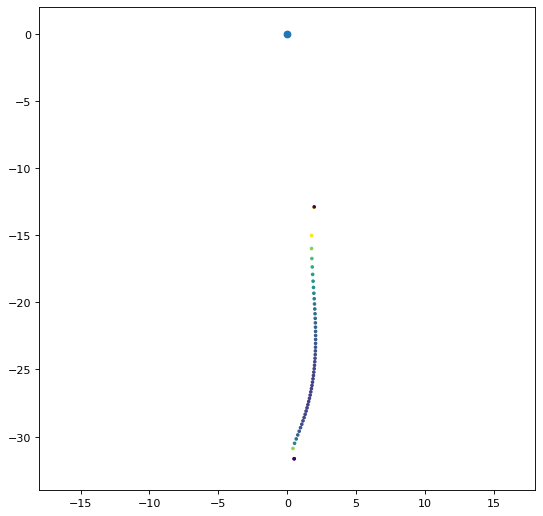

In [26]:
# Lx = 5.25
# solveLegPos(sample_guess, doPlot=True)
# Lx = 5.5
# solveLegPos(sample_guess, doPlot=True)
# Lx = 5.75
# solveLegPos(sample_guess, doPlot=True)
# Lx = 6.0
# solveLegPos(sample_guess, doPlot=True)
# Lx = 6.25
# solveLegPos(sample_guess, doPlot=True)
# Lx = 6.5
# solveLegPos(sample_guess, doPlot=True)
# Lx = 6.75
# solveLegPos(sample_guess, doPlot=True)
# Lx = 7
# solveLegPos(sample_guess, doPlot=True)
# Lx = 7.25
# solveLegPos(sample_guess, doPlot=False)


plt.figure(figsize=(8, 8), dpi=80)

plt.xlim(-18, 18)
plt.ylim(-34, 2)

plt.scatter(0, 0)

Lx = 5
footpos, root = solveLegPos(sample_guess, doPlot=False)

foot_xs = [footpos[0]]
foot_ys = [footpos[1]]
colors = [0]

for testcase in np.arange(5.0, 7.6, step=0.05):
    Lx = testcase
    footpos, root = solveLegPos(sample_guess, doPlot=False)

    foot_xs.append(footpos[0])
    foot_ys.append(footpos[1])
    colors.append(((foot_xs[-1] - foot_xs[-2])**2 + (foot_ys[-1] - foot_ys[-2])**2)**0.1)

colors = np.clip(colors, 0.7, 1)

plt.scatter(foot_xs, foot_ys, c=colors, s=5)

print(colors)
